<a href="https://colab.research.google.com/github/lwebb112/lwebb112/blob/main/capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# is there a bias of care based on the deaths of minorities for diabetes that aren't natural causes compared to non-hisanic whites 

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
from google.colab import data_table
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from google.colab import files
import io
import warnings
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')
from sklearn import linear_model

In [ ]:
files.upload()

Saving AH_Monthly_Provisional_Counts_of_Deaths_for_Select_Causes_of_Death_by_Sex__Age__and_Race_and_Hispanic_Origin.csv to AH_Monthly_Provisional_Counts_of_Deaths_for_Select_Causes_of_Death_by_Sex__Age__and_Race_and_Hispanic_Origin (1).csv


{'AH_Monthly_Provisional_Counts_of_Deaths_for_Select_Causes_of_Death_by_Sex__Age__and_Race_and_Hispanic_Origin.csv': b'AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"\n10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,0-4 years,182,162,4,2,0,0,4,0,1,0,22,1,0,0,0\n10/13/2021,2019,1,01/01/2019

In [ ]:
df = pd.read_csv('AH_Monthly_Provisional_Counts_of_Deaths_for_Select_Causes_of_Death_by_Sex__Age__and_Race_and_Hispanic_Origin.csv')

In [ ]:
df_2 = df.copy()

In [ ]:
# start with trying to understand the data
# this is the first ten rows within the dataset
df.head(10)

,AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,0-4 years,182,...,0,4,0,1,0,22,1,0,0,0
1,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,5-14 years,44,...,0,4,1,0,0,0,0,0,0,0
2,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,15-24 years,122,...,0,0,2,1,2,4,6,1,0,0
3,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,25-34 years,198,...,0,5,2,3,0,2,8,2,0,0
4,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,35-44 years,334,...,0,11,6,4,4,5,25,10,0,0
5,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,45-54 years,585,...,2,15,2,4,10,3,63,28,0,0
6,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,55-64 years,990,...,3,32,24,26,21,3,146,35,0,0
7,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,65-74 years,1355,...,32,40,43,38,54,2,249,76,0,0
8,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,75-84 years,1951,...,126,55,77,58,53,6,417,146,0,0
9,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,85 years and over,2720,...,374,93,114,38,44,19,745,240,0,0


In [ ]:
# this shows the breakdown of the causes of death within the dataset
df['AllCause'].head(30)

0      182
1       44
2      122
3      198
4      334
5      585
6      990
7     1355
8     1951
9     2720
10      17
11       3
12      12
13      43
14      55
15      68
16     129
17     149
18     148
19     150
20      24
21       6
22      12
23      32
24      62
25     106
26     256
27     444
28     738
29    1339
Name: AllCause, dtype: int64

In [ ]:
# identifying the natural cause of death and how different it is from the all cause
df['NaturalCause'].head(30)

0      162
1       28
2       45
3      100
4      260
5      500
6      942
7     1311
8     1908
9     2663
10      15
11       1
12       3
13      21
14      38
15      53
16     119
17     143
18     140
19     143
20      23
21       4
22       7
23      22
24      50
25      91
26     237
27     431
28     718
29    1299
Name: NaturalCause, dtype: int64

In [ ]:
df.shape

(3960, 24)

In [ ]:
#checking if there are any null values that may effect the dataset
df.isnull().sum()
# there's not any null values

AnalysisDate                                                                                         0
Date Of Death Year                                                                                   0
Date Of Death Month                                                                                  0
Start Date                                                                                           0
End Date                                                                                             0
Jurisdiction of Occurrence                                                                           0
Sex                                                                                                  0
Race/Ethnicity                                                                                       0
AgeGroup                                                                                             0
AllCause                                                                 

{'boxes': [<matplotlib.lines.Line2D at 0x7f9c7b1b5ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9c7b1c4b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c7b1b5050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c7b1cc690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9c7b1c4110>,
  <matplotlib.lines.Line2D at 0x7f9c7b1c4650>]}

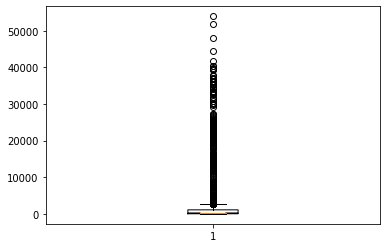

In [ ]:
#the box plot shows how skewed the information is which means it needs to be regulated
plt.boxplot(df['NaturalCause'], 20)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9c7aca1110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9c7aca1fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c7acaf050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c7aca8b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9c7aca16d0>,
  <matplotlib.lines.Line2D at 0x7f9c7aca14d0>]}

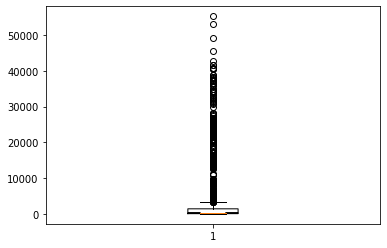

In [ ]:
plt.boxplot(df['AllCause'],20)

In [ ]:
df['deaths']= df['AllCause'] - df['NaturalCause']

In [ ]:
df.head(10)

,AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,...,Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",deaths
0,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,0-4 years,182,...,4,0,1,0,22,1,0,0,0,20
1,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,5-14 years,44,...,4,1,0,0,0,0,0,0,0,16
2,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,15-24 years,122,...,0,2,1,2,4,6,1,0,0,77
3,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,25-34 years,198,...,5,2,3,0,2,8,2,0,0,98
4,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,35-44 years,334,...,11,6,4,4,5,25,10,0,0,74
5,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,45-54 years,585,...,15,2,4,10,3,63,28,0,0,85
6,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,55-64 years,990,...,32,24,26,21,3,146,35,0,0,48
7,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,65-74 years,1355,...,40,43,38,54,2,249,76,0,0,44
8,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,75-84 years,1951,...,55,77,58,53,6,417,146,0,0,43
9,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,85 years and over,2720,...,93,114,38,44,19,745,240,0,0,57


{'boxes': [<matplotlib.lines.Line2D at 0x7f9c7ac1f0d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9c7ac27150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c7ac2e190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c7ac27c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9c7ac1f690>,
  <matplotlib.lines.Line2D at 0x7f9c7ac1fbd0>]}

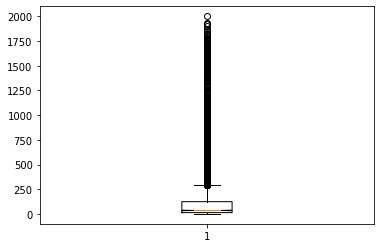

In [ ]:
plt.boxplot(df['deaths'],20)

In [ ]:
df['deaths']= np.log(df['deaths'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f9c7ab9c4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9c7aba2550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c7aba9590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c7aba9050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9c7ab9ca90>,
  <matplotlib.lines.Line2D at 0x7f9c7ab9cfd0>]}

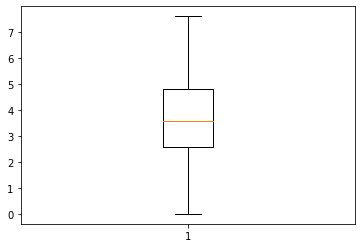

In [ ]:
plt.boxplot(df['deaths'])

In [ ]:
# creating a numpy array
array = np.array(df['Diabetes mellitus (E10-E14)'])
 
 
# printing array
print("Array : " + str(array))
 
# length of array
n = array.size
 
# N-D array N dimension
N = 4
 
# calculating M
M = n//N
 
# reshaping numpy array
 

 
# creating another reshaped array
reshaped2 = np.reshape(array, (1, -1))
 
# printing reshaped array
print("Second Reshaped Array : ")
print(reshaped2)

Array : [ 0  1  1 ... 11  9  2]
Second Reshaped Array : 
[[ 0  1  1 ... 11  9  2]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = reshaped2
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X)
# transform the test test
X_scaled = scaler.transform(X)
# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])
# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])
# Manually normalise without using scikit-learn
X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# Verify manually VS scikit-learn estimation
print(np.allclose(X_scaled, X_manual_scaled))

False


In [ ]:


df['Diabetes mellitus (E10-E14)'].isnull().sum()

0

In [ ]:
df['Diabetes mellitus (E10-E14)'].head(20)

0      0
1      1
2      1
3      6
4      9
5     40
6     62
7     87
8     95
9     83
10     0
11     0
12     0
13     1
14     5
15     5
16    10
17    13
18     9
19     3
Name: Diabetes mellitus (E10-E14), dtype: int64

In [ ]:
df['deaths'].isnull().sum()

0

In [ ]:
df['deaths'].head(30)

0     2.995732
1     2.772589
2     4.343805
3     4.584967
4     4.304065
5     4.442651
6     3.871201
7     3.784190
8     3.761200
9     4.043051
10    0.693147
11    0.693147
12    2.197225
13    3.091042
14    2.833213
15    2.708050
16    2.302585
17    1.791759
18    2.079442
19    1.945910
20    0.000000
21    0.693147
22    1.609438
23    2.302585
24    2.484907
25    2.708050
26    2.944439
27    2.564949
28    2.995732
29    3.688879
Name: deaths, dtype: float64

Coefficients: 
 [44.94589447]
Mean squared error: 33296.97
Coefficient of determination: 0.31


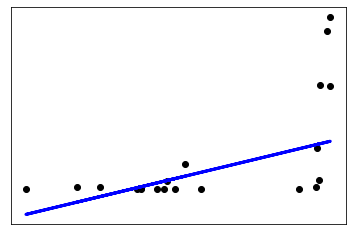

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

df = df.reset_index()

# Load the diabetes dataset
X = df['deaths']
Y = df['Diabetes mellitus (E10-E14)']

# Use only one feature
X = X[:, np.newaxis]


# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
Y_train = Y[:-20]
Y_test = Y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# seen the coefficient of determination is below .75 there's a low determination that deaths and diabetes are correlated

In [ ]:
df_2 = pd.DataFrame()


In [ ]:
# creating a numpy array for deaths
array2 = np.array(df['deaths'])
 
 
# printing array
print("Array : " + str(array))
 
# length of array
n = array2.size
 
# N-D array N dimension
N = 4
 
# calculating M
M = n//N
 
# reshaping numpy array
# converting it to 2-D from 1-D array
reshaped1_2 = array2.reshape((1,-1))
 
# printing reshaped array
print("First Reshaped Array : ")
print(reshaped1_2)

Array : [ 0  1  1 ... 11  9  2]
First Reshaped Array : 
[[2.99573227 2.77258872 4.34380542 ... 2.48490665 1.60943791 1.09861229]]


In [ ]:
# creating a numpy array for race
array3 = np.array(df['Race/Ethnicity'])
 
 
# printing array
print("Array : " + str(array))
 
# length of array
n = array3.size
 
# N-D array N dimension
N = 4
 
# calculating M
M = n//N
 
# reshaping numpy array
# converting it to 2-D from 1-D array
reshaped1_3 = array3.reshape((1,-1))
 
# printing reshaped array
print("First Reshaped Array : ")
print(reshaped1_3)

Array : [ 0  1  1 ... 11  9  2]
First Reshaped Array : 
[['Hispanic' 'Hispanic' 'Hispanic' ... 'Other' 'Other' 'Other']]


In [ ]:
# random forest model would better fit this question.

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)
X = df[['Race/Ethnicity', 'deaths']]
Y = df['Diabetes mellitus (E10-E14)']
X = pd.get_dummies(X)

print(f'{cross_val_score(rfc, X, Y, cv=10)}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

[0.21882952 0.19132653 0.19897959 0.21683673 0.2372449  0.18877551
 0.21428571 0.21938776 0.21428571 0.20663265]

Cross-validation time elapsed: 6.46 seconds.


In [ ]:
# according to the results of the random forest model similar to the linear correlation it cannot be determined
# if there's a correlation between deaths from diabetes and minorities

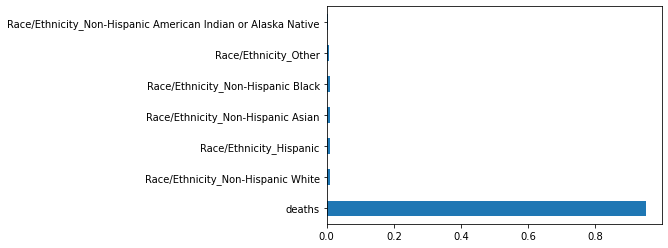

In [ ]:
rfc.fit(X, Y)
plt.show()

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
# test if the random forrest is underfitting or overfitting

In [ ]:
df['deaths'].isnull().values.any()

False

In [ ]:
df['Diabetes mellitus (E10-E14)'].isnull().values.any()

False

In [ ]:
np.isfinite(df['deaths']).sum()

2962

In [ ]:
np.isinf(df['deaths']).sum()

0

In [ ]:
df['log_d'] = np.log(df['Diabetes mellitus (E10-E14)'])

In [ ]:
np.isinf(df['log_d']).sum()

0

In [ ]:
df['log_d'].head()

1    0.000000
2    0.000000
3    1.791759
4    2.197225
5    3.688879
Name: log_d, dtype: float64

In [ ]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)



In [ ]:
from sklearn.linear_model import LinearRegression
# `X` is the feature
X =df[['deaths', 'log_d']]

# Define `Y` as a quadratic function of `X`
Y = X + X**2

# This is the model with a linear feature
lrm_underfit = LinearRegression().fit(X, Y)
preds_underfit = lrm_underfit.predict(X)

# This is the model with a quadratic feature
X_correct = pd.concat([X, X**2], axis=1)
lrm_correct = LinearRegression().fit(X_correct, Y)
preds_correct = lrm_correct.predict(X_correct)

# This is the model with up to a tenth order polynomial of the feature
X_overfit = pd.concat([X**i for i in range(1,11)], axis=1)
lrm_overfit = LinearRegression().fit(X_overfit, Y)
preds_overfit = lrm_overfit.predict(X_overfit)

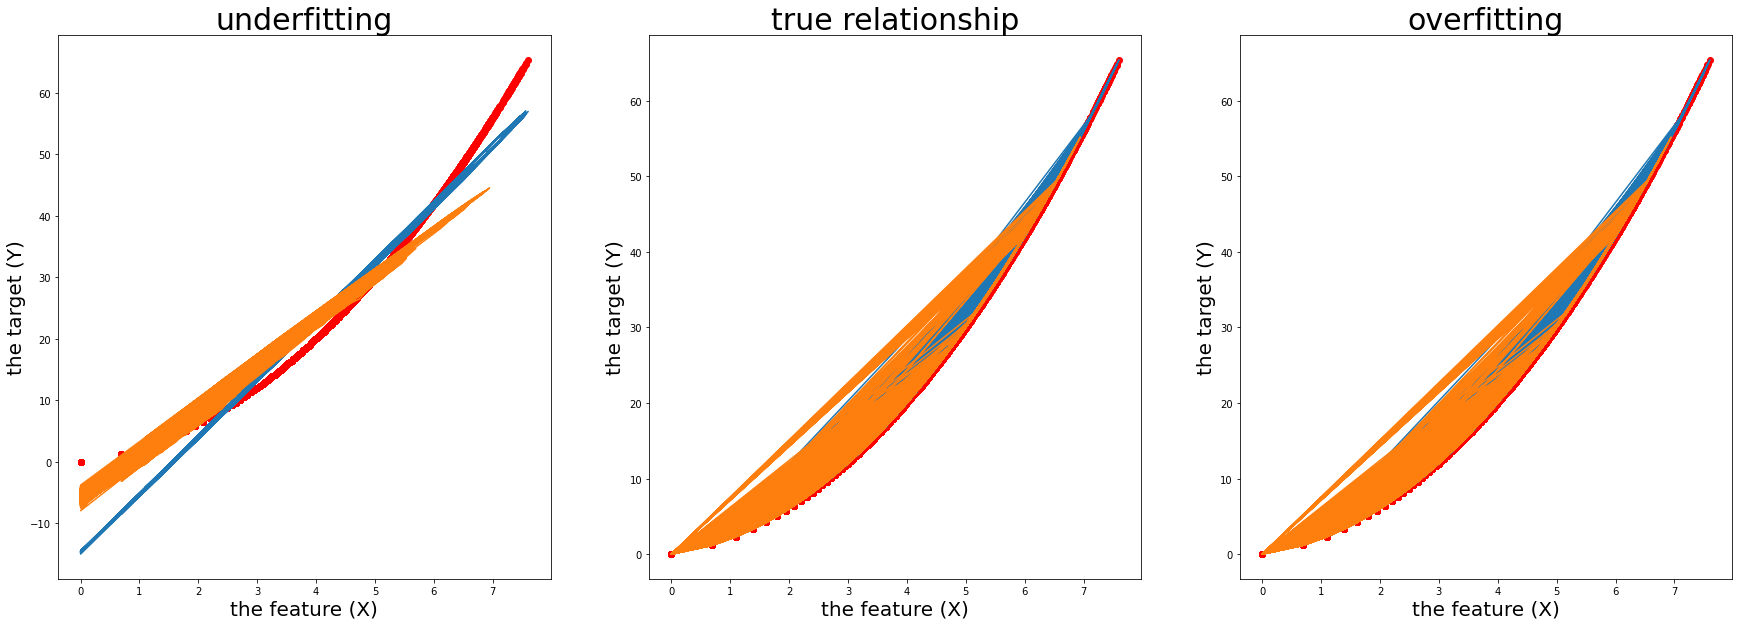

In [ ]:
plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.scatter(X, Y, color="red")
plt.plot(X, preds_underfit)
plt.title("underfitting", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

plt.subplot(1,3,2)
plt.scatter(X, Y, color="red")
plt.plot(X, preds_correct)
plt.title("true relationship", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

plt.subplot(1,3,3)
plt.scatter(X, Y, color="red")
plt.plot(X, preds_overfit)
plt.title("overfitting", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# Fit an OLS model using scikit-learn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# You are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The number of observations in training set is 2369
The number of observations in test set is 593
R-squared of the model in the training set is: 0.9504837859639299
-----Test set statistics-----
R-squared of the model in the test set is: 0.9464686281855117
Mean absolute error of the prediction is: 2.689260833315938
Mean squared error of the prediction is: [11.99899484 11.10686236]
Root mean squared error of the prediction is: [3.46395653 3.33269596]
Mean absolute percentage error of the prediction is: deaths    inf
log_d     inf
dtype: float64


In [ ]:
# the training set and test set are close .94, .95

In [ ]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

#  predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)



print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: -1.3322676295501878e-15
-----Test set statistics-----
R-squared of the model on the test set is: -0.0023086239738953074
Mean absolute error of the prediction is: 12.521075143051572
Mean squared error of the prediction is: [267.56936658 179.14994033]
Root mean squared error of the prediction is: [16.35754769 13.38469052]
Mean absolute percentage error of the prediction is: deaths    inf
log_d     inf
dtype: float64


In [ ]:
from sklearn.linear_model import Lasso
# using lasso regression
lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

 predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: -1.3322676295501878e-15
-----Test set statistics-----
R-squared of the model on the test set is: -0.0023086239738953074
Mean absolute error of the prediction is: 12.521075143051572
Mean squared error of the prediction is: [267.56936658 179.14994033]
Root mean squared error of the prediction is: [16.35754769 13.38469052]
Mean absolute percentage error of the prediction is: deaths    inf
log_d     inf
dtype: float64


In [ ]:
# the linear regression proved to be most benefitial